In [62]:
import random
# random.seed(0)  #Set this tp help in debugging. Always gives same output


def rollDie():
    return random.choice([1,2,3,4,5,6])

def testRoll(n=10):
    
    result =''
    
    for i in range(n):
        result += str(rollDie())
        
    print(result)

testRoll()

2321535652


In [63]:

def genEven():
    '''
    Returns a random even number x, where 0 <= x < 100
    '''
    L = [2*x for x in range(0,50)]
    
    return random.choice(L)   

genEven()

38

In [67]:
def runSim(goal, numTrials):
    
    total = 0
    
    for i in range(numTrials):
        result = ''
        for j in range(len(goal)):
            result += str(rollDie())
            
        if result == goal:
            total += 1
            
    print("Actual probability = ", round(1/(6**len(goal)),8))
    
    estimateProb = round(total/numTrials, 8)
    
    print("Estimated Probability = ", round(estimateProb, 16))
    
runSim('11111', 1000000)

Actual probability =  0.0001286
Estimated Probability =  0.00013


In [76]:
def fracBoxCars(numTests):
    # BoxCar ==> dice1 = 6 and dice2 = 6
    numBoxCars = 0
    for i in range(numTests):
        if rollDie() == 6 and rollDie() == 6:
            numBoxCars += 1
    return numBoxCars/numTests

print('Frequency of double 6 = ', str(fracBoxCars(100000) * 100) + '%')
print("Freq of double 6 as per closed form = ", str((1/6)*(1/6)*100) + '%')

# So estimated prob and closed form prob are almost the same

Frequency of double 6 =  2.732%
Freq of double 6 as per closed form =  2.7777777777777777%


# Random Walks

In [1]:
class Location(object):
    
    def __init__(self, x, y):
        """
        x, y: float
        """
        
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """
        deltaX and deltaY are floats
        
        """
        return Location(self.x+deltaX, self.y+deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        
        ox = other.x
        oy = other.y
        
        xDist = self.x - ox
        yDist = self.y -oy
        
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        
        return '<'+ str(self.x) + ', ' + str(self.y) + '>'
    
class Field(object):
    """
    Field contains a dict mapping drunks to their locations on the field
    """
    
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate Drunk')
        else:
            self.drunks[drunk] = loc
            
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    
    def moveDrunk(self, drunk):
        
        # Drunk needs to be in field to move him
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
            
        # takeStep method from drunk class
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        
        # using move method from Location class 
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
class Drunk(object):
    # Base class to be inherited by subclasses
    
    def __init__(self, name = None):
        self.name = name
        
    def __str__(self, name):
        return "This drunk is named" + self.name

import random
class UsualDrunk(Drunk):
    
    def takeStep(self):
        stepChoices = [(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
class ColdDrunk(Drunk):
    
    def takeStep(self):
        """
        Largest step taken in South direction where it is supposed to be warmer
        """
        
        stepChoices =[(0.0, 0.9), (0.0, -1.1), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [2]:
def walk(f, d, numSteps):
    """
    f: a Field, d: a Drunk in f, numSteps: int >= 0
    
    Moves d numSteps times; 
    
    returns the distance between the final location and the location at the start of walk.
    """
    
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps,numTrials, dClass):
    """
    numStep, numTrials: int >= 0
    dClass: subClass of Drunk
    
    simulates numTrials walks of numSteps steps each.
    returns list of final distances for each trial
    """
    
    Homer = dClass()
    origin = Location(0,0)
    distances = []
    
    for t in range(numTrials):
        
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """
    walkLengths: sequence of ints >= 0
    numTrials: int > 0
    dClass: a subClass of Drunk
    for each numSteps in walkLengths:
        run simWalks with numTrials
        prints results
    """
    
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round( sum(distances)/ len(distances), 4))
        print(' Max =', max(distances), ' Min =',min(distances))
    print('\n')

In [3]:
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2  Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6  Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3  Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5  Min = 10.0




In [4]:
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0  Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0  Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.28
 Max = 2.0  Min = 0.0




In [5]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        
random.seed(0)

simAll((UsualDrunk, ColdDrunk), (1, 10, 100, 1000, 10000), 100)


UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0  Min = 1.0
UsualDrunk random walk of 10 steps
 Mean = 2.948
 Max = 7.2  Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.453
 Max = 21.6  Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.138
 Max = 72.8  Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 90.661
 Max = 222.9  Min = 5.1


ColdDrunk random walk of 1 steps
 Mean = 0.996
 Max = 1.1  Min = 0.9
ColdDrunk random walk of 10 steps
 Mean = 2.788
 Max = 7.1  Min = 0.2
ColdDrunk random walk of 100 steps
 Mean = 9.602
 Max = 22.9  Min = 0.4
ColdDrunk random walk of 1000 steps
 Mean = 53.525
 Max = 108.3  Min = 7.3
ColdDrunk random walk of 10000 steps
 Mean = 495.128
 Max = 654.6  Min = 323.9




In [6]:
# Plotting random walks

class styleIterator(object):
    
    def __init__(self, styles):
        # styles is an iterable
        
        
        self. index = 0
        self.styles = styles
        
    def nextStyle(self):
        #self.styles is treated as a ring
        
        result = self.styles[self.index]
        
        if self.index == len(self.styles) - 1:
            self.index = 0
            
        else:
            self.index += 1
        return result
    
def simDrunk(numTrials, dClass, walkLengths):
    
    meanDistances = []
    
    for numSteps in walkLengths:
        
        print("Starting sim of ", numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        
        meanDistances.append(mean)
        
    return meanDistances

Starting simulation of  UsualDrunk
Starting sim of  10 steps
Starting sim of  100 steps
Starting sim of  1000 steps
Starting sim of  10000 steps
Starting simulation of  ColdDrunk
Starting sim of  10 steps
Starting sim of  100 steps
Starting sim of  1000 steps
Starting sim of  10000 steps


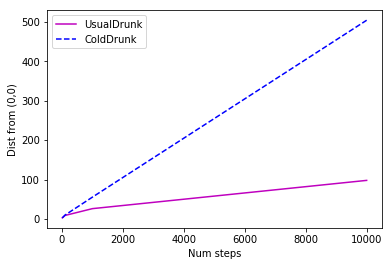

In [9]:
import pylab
def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of ', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
    pylab.xlabel("Num steps")
    pylab.ylabel("Dist from (0,0)")
    pylab.legend(loc = 'best')
    
numSteps = (10, 100, 1000, 10000)

simAll((UsualDrunk, ColdDrunk), numSteps, 100)

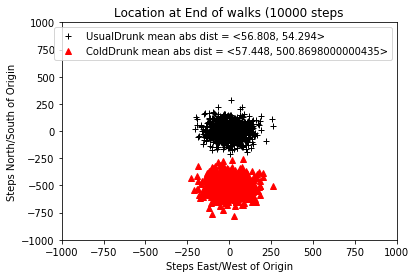

In [10]:
def getFinalLocs(numSteps, numTrials, dClass):
    
    locs = []
    d = dClass()
    
    for t in range(numTrials):
        
        f = Field()
        f.addDrunk(d, Location(0,0))
        for s in range(numSteps):
            f.moveDrunk(d)
            
        locs.append(f.getLoc(d))
        
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, label = dClass.__name__ + ' mean abs dist = <' + str(meanX) + ', ' + str(meanY) +'>')
    pylab.title("Location at End of walks (" + str(numSteps) + ' steps')
    pylab.xlim(-1000, 1000)
    pylab.ylim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend()
    
random.seed(0)
plotLocs((UsualDrunk, ColdDrunk), 10000, 1000)

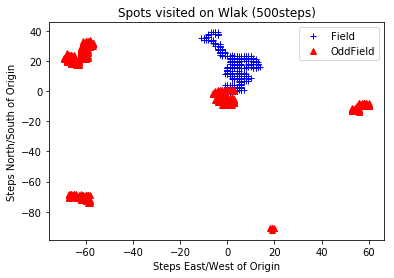

In [20]:
class OddField(Field):
    
    def __init__(self, numHoles = 1000, xRange = 100, yRange = 100):
        
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX , newY)
            self.wormholes[(x, y)] = newLoc
    
    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]
    
    
def traceWalk(fieldKinds, numSteps):
    
    styleChoice = styleIterator(('b+', 'r^', 'ko'))
    
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
            
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
            
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, label = fClass.__name__)
        pylab.title('Spots visited on Wlak (' + str(numSteps)+"steps)")
        
        pylab.xlabel('Steps East/West of Origin')
        pylab.ylabel('Steps North/South of Origin')
        pylab.legend()
        

random.seed(0)
traceWalk((Field, OddField), 500)


In [21]:
# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)

In [25]:
d = {}
d[Position(5,6)] = 1
print(len(d))

1
